In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PharmHash.PharmHash import Pharmacophore as ph
from PharmHash import changes_coords, reading, show

Вытащим данные из файлов

In [4]:
RMSD = reading.load_rmsd('E:\learn\python\KFU\pharmacophores\PharmHash\data\confs_4386_mirror.rms')
ph_coords = reading.load_from_coords('E:\learn\python\KFU\pharmacophores\PharmHash\data\confs_4386.coords')

Следующая ячейка создает csv файл с названием, шагом округления, совпадением, и среднеквадратичским отклонением от своего зеркального отображения

In [5]:
accs = [0.1, 0.2, 0.5, 1, 1.5, 2]

errors = 0
with open ('log_file2.csv', 'w') as f:
    a = ','.join(map(str, accs))
    f.write(f'name,{a},RMSD\n')
                
    for name, coord in ph_coords.items():
        str_to_write= f'{name},'
        
        ph1 = ph(name, coord, RMSD[name])
        ph2 = ph(name, coord, RMSD[name])
        ph2.coords = changes_coords.reflection(ph2.coords, 'x')
        
        for acc in accs:
            try:
                ss =  f'{ph1.is_match(ph2, acc)},'
            except:
                errors += 1
                ss = f'{False},'
            finally:
                str_to_write += ss
        str_to_write += f'{ph1.rmsd}\n'
        f.write(str_to_write)


Проведем анализ полученных данных при помощи pandas

In [33]:
table = pd.read_csv('log_file2.csv')
table = table[table.RMSD != 1.0000000000000006e+300]


In [64]:
# настроим число столбцов на гистограмме(всегда должно быть одинаковым)
step = 0.1
n_bins = int(max(table['RMSD'])//step + 2)
bins_ = [round(step*i, 2) for i in range(n_bins)]

In [65]:
def plt_show(ac):
    
    A = table[['name', ac, 'RMSD']]
    T= A[A[ac]==True]
    F= A[A[ac]==False]
    
    
    plt.figure(figsize = (12,8))
    plt.hist(A['RMSD'], bins = bins_, edgecolor='white', alpha=0.2, label='All')
    plt.hist(F['RMSD'], bins = bins_, edgecolor='white', alpha=0.5, label='Not match')
    plt.hist(T['RMSD'], bins = bins_, edgecolor='white', alpha=0.5, label='Match')

    plt.legend()
    plt.title(f'Histogram - Matched Pharmacophores. Accuracy={ac}')
    plt.xlabel('RMSD')
    plt.ylabel('Count')
    plt.show()


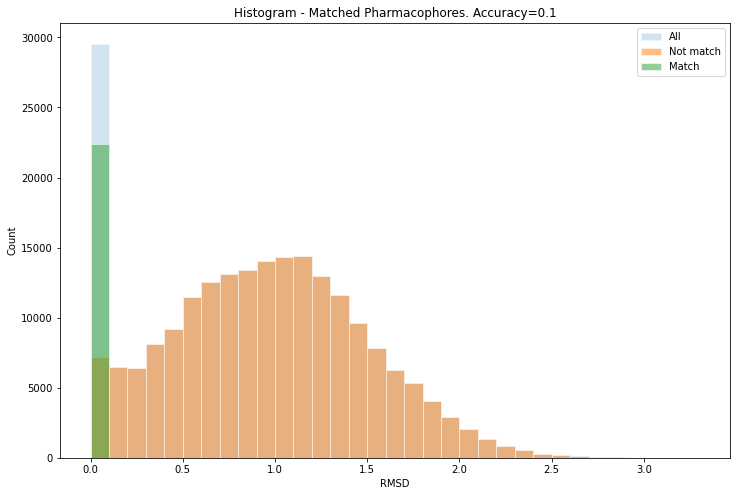

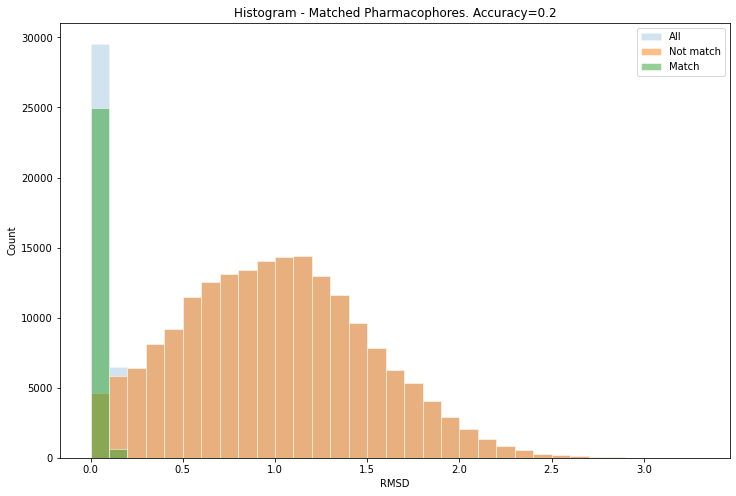

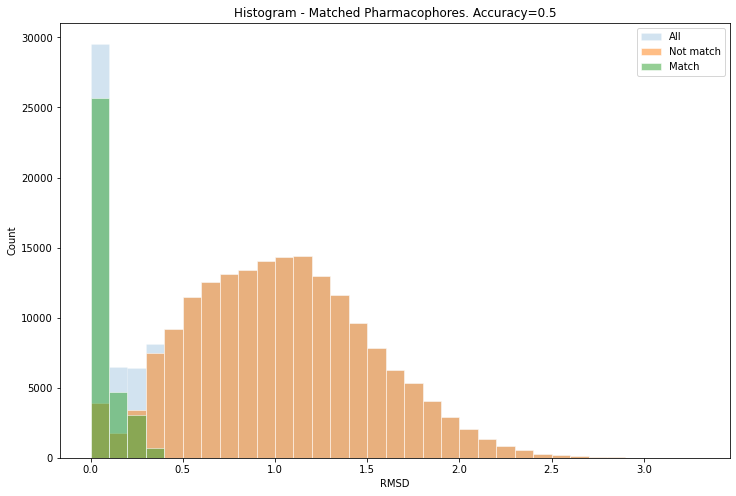

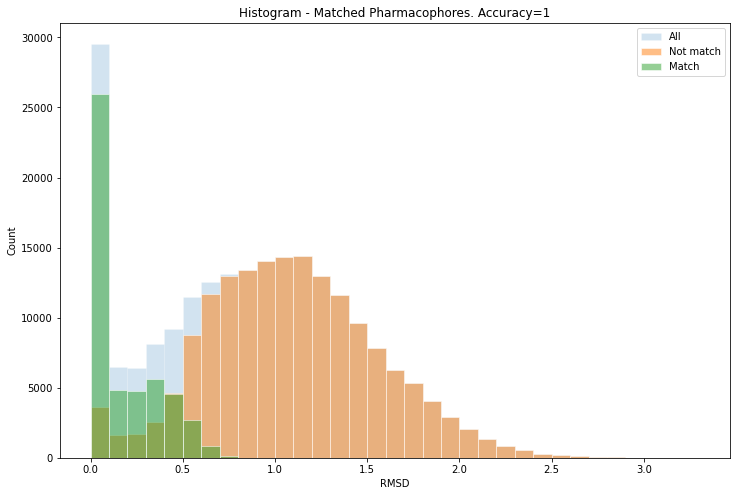

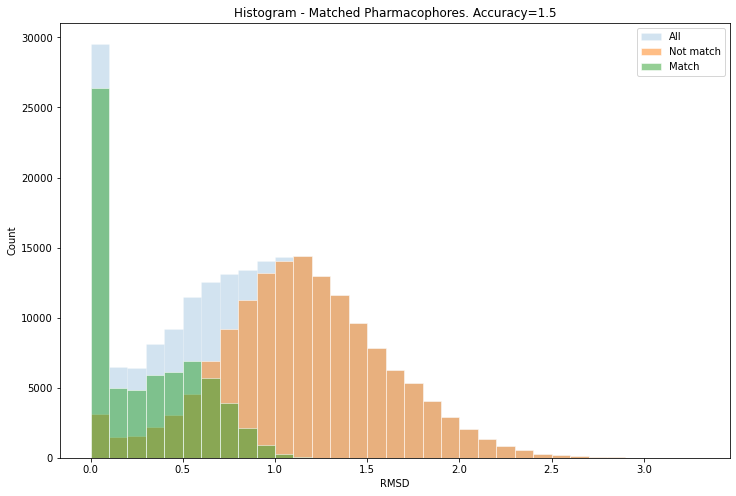

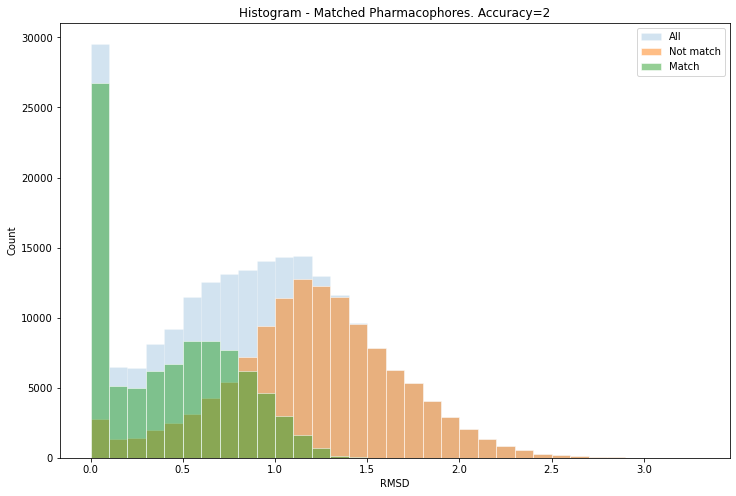

In [66]:
for ac in accs:
    plt_show(str(ac))